In [4]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [1]:
import tensorflow
print (tensorflow.__version__)

2.3.0


In [3]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
data_dir = '/content/gdrive/MyDrive/GAN_datasets/'

In [17]:
!unzip /content/gdrive/MyDrive/GAN_datasets/anime.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/images/62764_2019.jpg  
  inflating: /content/images/62765_2019.jpg  
  inflating: /content/images/62766_2019.jpg  
  inflating: /content/images/62767_2019.jpg  
  inflating: /content/images/62768_2019.jpg  
  inflating: /content/images/62769_2019.jpg  
  inflating: /content/images/6276_2003.jpg  
  inflating: /content/images/62770_2019.jpg  
  inflating: /content/images/62771_2019.jpg  
  inflating: /content/images/62772_2019.jpg  
  inflating: /content/images/62773_2019.jpg  
  inflating: /content/images/62774_2019.jpg  
  inflating: /content/images/62775_2019.jpg  
  inflating: /content/images/62776_2019.jpg  
  inflating: /content/images/62777_2019.jpg  
  inflating: /content/images/62778_2019.jpg  
  inflating: /content/images/62779_2019.jpg  
  inflating: /content/images/6277_2003.jpg  
  inflating: /content/images/62780_2019.jpg  
  inflating: /content/images/62781_2019.jpg  
  inflating: /content/images/62

In [2]:
import glob
files = glob.glob('/content/images/*.jpg')
len(files)

63565

In [5]:
for file in files[:10]:
    anime_img = cv2.imread(file)
    print (anime_img.shape)

(124, 124, 3)
(93, 93, 3)
(116, 116, 3)
(103, 103, 3)
(98, 98, 3)
(69, 69, 3)
(78, 78, 3)
(92, 92, 3)
(97, 97, 3)
(122, 122, 3)


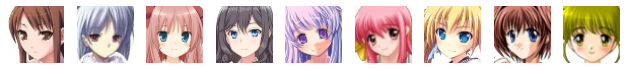

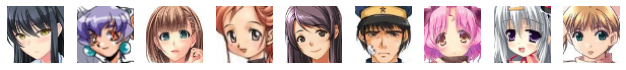

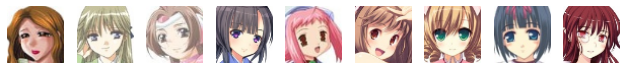

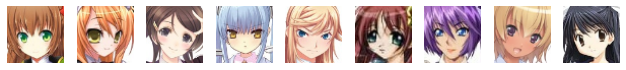

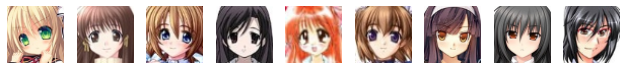

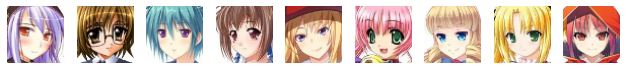

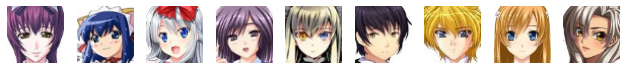

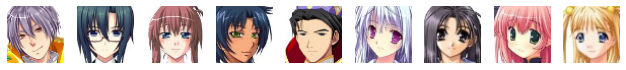

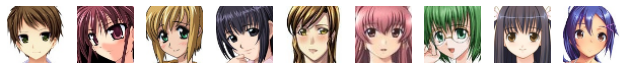

In [6]:
for k in range(9):
    plt.figure(figsize=(11, 11))
    for j in range(9):
        f = np.random.choice(files)
        anime_img = cv2.imread(f)
        anime_img = cv2.cvtColor(anime_img, cv2.COLOR_BGR2RGB)
        anime_img = cv2.resize(anime_img, (56, 56))
        plt.subplot(990 + 1 + j)
        plt.imshow(anime_img)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

In [7]:
from tqdm import tqdm_notebook

images = []
for file in tqdm_notebook(files):
    anime_img = cv2.imread(file)
    anime_img = cv2.cvtColor(anime_img, cv2.COLOR_BGR2RGB)
    anime_img = cv2.resize(anime_img, (56, 56))
    images.append((anime_img-127.5)/127.5)

images = np.array(images)
print (images.shape)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



(63565, 56, 56, 3)


# Generator Model

In [8]:
random_input = tensorflow.keras.layers.Input(shape = 100)

x = tensorflow.keras.layers.Dense(64 * 5 * 5)(random_input)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Reshape((5, 5, 64))(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(5,5), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(7,7), strides=(2,2))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(7,7))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(7,7))(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=64, kernel_size=(7,7))(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=3, kernel_size=(8,8))(x)
generated_image = tensorflow.keras.layers.Activation('tanh')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 1600)              161600    
_________________________________________________________________
activation (Activation)      (None, 1600)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1600)              6400      
_________________________________________________________________
reshape (Reshape)            (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 13, 13, 64)        102464    
_________________________________________________________________
activation_1 (Activation)    (None, 13, 13, 64)       

# Discriminator

In [9]:
image_input = tensorflow.keras.layers.Input(shape=(56, 56, 3))

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3))(image_input)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2)(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(7,7))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Flatten()(x)

x = tensorflow.keras.layers.Dense(1)(x)
real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 56, 56, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 54, 54, 64)        1792      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 64)        102464    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 25, 25, 64)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 25, 25, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)       

In [10]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# DC GAN

In [11]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

dcgan_model = tensorflow.keras.models.Model(random_input, d_output)
dcgan_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
functional_1 (Functional)    (None, 56, 56, 3)         1086851   
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 422657    
Total params: 1,509,508
Trainable params: 1,083,139
Non-trainable params: 426,369
_________________________________________________________________


# Compiling Models

In [12]:
dcgan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [15]:
indices = [i for i in range(0, len(images))]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = images[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(11, 11))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        fake_samples = (fake_samples+1.0)/2.0
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j])
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training GAN

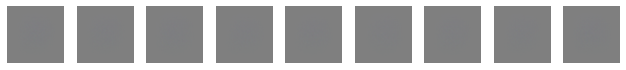

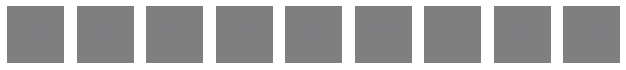

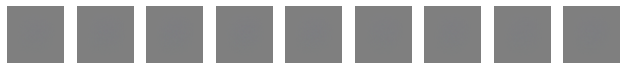

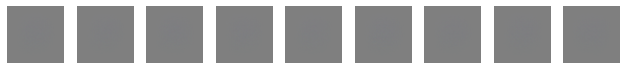

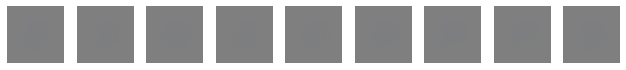

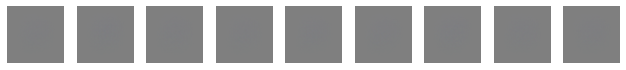

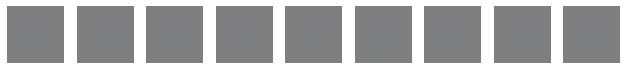

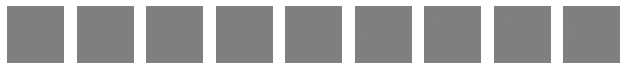

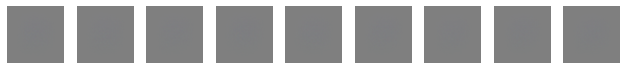

Epoch:0, Step:0, D-Loss:0.609, D-Acc:82.000, G-Loss:0.709
Epoch:0, Step:50, D-Loss:0.083, D-Acc:99.000, G-Loss:4.041
Epoch:0, Step:100, D-Loss:0.309, D-Acc:89.000, G-Loss:0.270
Epoch:0, Step:150, D-Loss:0.328, D-Acc:93.000, G-Loss:0.070
Epoch:0, Step:200, D-Loss:0.161, D-Acc:95.000, G-Loss:10.013
Epoch:0, Step:250, D-Loss:0.071, D-Acc:99.000, G-Loss:3.075
Epoch:0, Step:300, D-Loss:0.190, D-Acc:95.000, G-Loss:17.596
Epoch:0, Step:350, D-Loss:0.024, D-Acc:98.000, G-Loss:12.104
Epoch:0, Step:400, D-Loss:0.038, D-Acc:99.000, G-Loss:11.499
Epoch:0, Step:450, D-Loss:0.047, D-Acc:98.000, G-Loss:0.199
Epoch:1, Step:0, D-Loss:0.068, D-Acc:99.000, G-Loss:8.387
Epoch:1, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:0.199
Epoch:1, Step:100, D-Loss:0.122, D-Acc:96.000, G-Loss:1.703
Epoch:1, Step:150, D-Loss:0.038, D-Acc:99.000, G-Loss:3.883
Epoch:1, Step:200, D-Loss:0.102, D-Acc:96.000, G-Loss:5.883
Epoch:1, Step:250, D-Loss:0.018, D-Acc:100.000, G-Loss:8.132
Epoch:1, Step:300, D-Loss:0.004, D-Acc:1

In [ ]:
epochs = 100
batch_size = 100
steps = 500
noise_size = 100

for i in range(0, epochs):
    if (i%10 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = dcgan_model.train_on_batch(gan_input, gan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

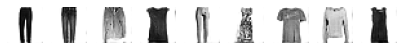

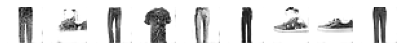

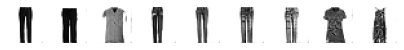

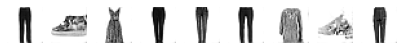

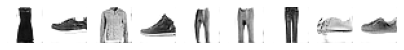

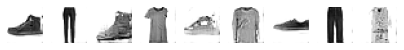

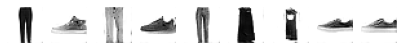

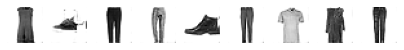

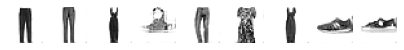

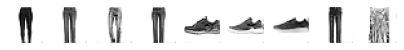

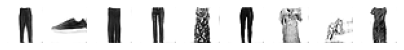

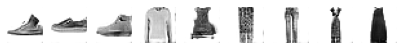

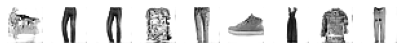

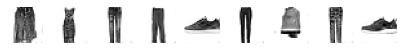

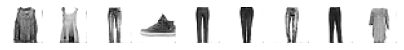

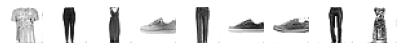

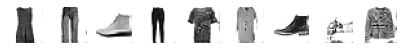

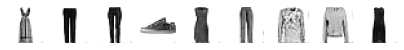

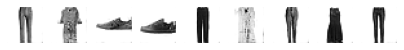

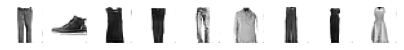

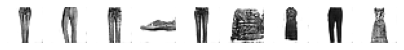

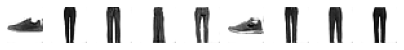

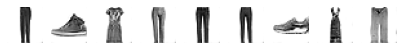

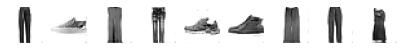

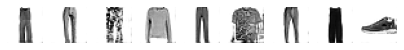

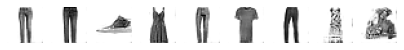

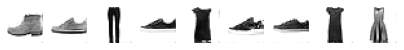

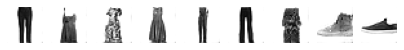

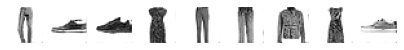

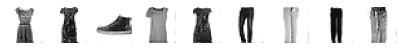

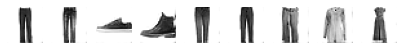

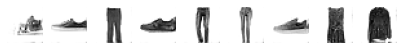

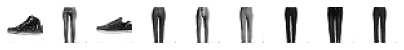

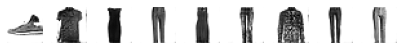

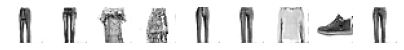

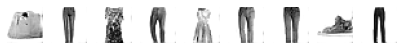

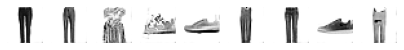

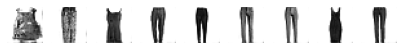

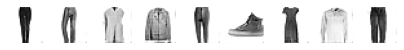

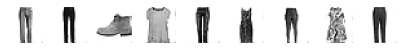

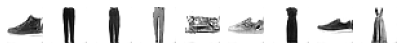

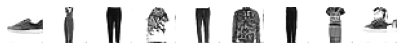

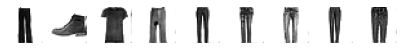

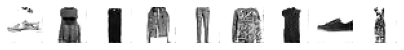

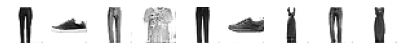

In [12]:
#Generating Unlimited samples
for i in range(5):
    show_generator_results(generator_network)